<a href="https://colab.research.google.com/github/othy1010/genc_app/blob/main/Copy_of_CBIR_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compte rendu de l'atelier 1 en utilisant CBIR**

Cet atelier a ete fait avec Google Colab en le montant avec Google drive oû la base de donnee a ete stockee

la base de donnee contenait 90 classes (90 differents animaux ) mais pour des raisons de performance on a retenu que 20 classes

Cependant la precision n'est pas la meilleur ~ 24% et ceci est du au faible nombre d'image par classe

In [26]:
#!pip install scikit-image
!pip install pyngrok
!pip install flask_ngrok


In [2]:
# skimage for read images 
from skimage import data
from skimage import io
from skimage import transform
import pickle
# to plot some example image
import matplotlib.pyplot as plt
# to manipulate dir and files
import os
# libraries
import random
import numpy as np
import pickle
import json
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import nltk
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import base64

#to resize images

In [3]:
classes={}
def load_data(data_dir,computed):
    # Get all subdirectories of data_dir, each represents a label.
    #directories = [d for d in os.listdir(data_dir)
    #              if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    animals=os.listdir(data_dir)
    print("total classes: "+ str(len(animals)))
    
    print("total classes computed :"+ str(computed))
    data_dir_cp=data_dir
    index=0
    labels = []
    images = []
    for i in animals:
      if index > computed: 
        break 

      classes[index]=i
      data_dir+="/"+i
      files=[]  
      print(index)
      for f in os.listdir(data_dir):
        files.append(data_dir+"/"+f)
      for f in files:
          images.append(io.imread(f))
          labels.append(index)
      index+=1
      data_dir=data_dir_cp
    
    return images, labels


In [4]:
path_train ="/content/drive/MyDrive/Colab_Notebooks/animals"

#file =[]
#for f in os.listdir(path_train):
#  file.append(path_train+f) 
#file
#os.listdir('/content/drive/MyDrive/Colab_Notebooks/Indexiation_CR/train')
images, labels = load_data(path_train,20)

total classes: 90
total classes computed :20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [30]:
print("Number of classes: " , len(set(labels)))
print("Number of images : ", len(images))

Number of classes:  21
Number of images :  1268


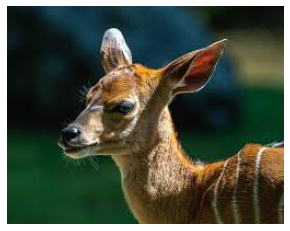

In [31]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(images[9])

In [ ]:
print(labels[150])

In [ ]:
images[2].shape

In [ ]:
images[154].shape

In [32]:
images_resized = [transform.resize(image, (227, 227)) for image in images]
#images_test_resized = [transform.resize(image, (227, 227)) for image in images_test]

(227, 227, 3)

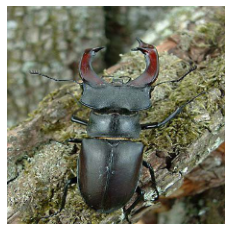

In [33]:
plt.axis('off')
plt.imshow(images_resized[100])
images_resized[100].shape

In [34]:
import numpy as np
images_resized_array = [np.array(image) for image in images_resized]
#images_test_resized_array = [np.array(image) for image in images_test_resized]

In [35]:
images_resized_array_reshape = [image.reshape(-1) for image in images_resized_array]
#images_test_resized_array_reshape = [image.reshape(-1) for image in images_test_resized_array]

In [36]:
len(images_resized_array_reshape)

1268

In [37]:
images_resized_array_reshape[1].shape


(154587,)

In [38]:
x=images_resized_array_reshape
y=labels
#x_test=images_test_resized_array_reshape
#y_test=labels_test

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)# nombre impair pour vote
model.fit(x, y)

#save the model
filename = '/content/drive/MyDrive/Colab_Notebooks/Indexiation_CR/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


#result = loaded_model.score(X_test, Y_test)

In [ ]:
#y_pred = model.predict(x_test)


la precision est de 23% cela du au petit nombre d'image (60 images par classe)

In [40]:
y_train=model.predict(x)
m=0
for i in range(len(y_train)):
  if y_train[i]==y[i]:
    m+=1
print(m/len(y))

0.2334384858044164


In [ ]:
#print(y_pred)
#print(len(y_pred))

In [ ]:
#import matplotlib.pyplot as plt
#plt.axis('off')
#plt.imshow(images_test[4])
#print("I'm pretty sure it's a :" , classes[y_pred[4]])

In [ ]:
#imageoftest1=images_test_resized[1]
#plt.axis('off')
#plt.imshow(imageoftest1)
#print("I'm pretty sure it's a :" , classes[y_pred[1]])

In [ ]:
#imageoftest100=images_test_resized[40]
#plt.axis('off')
#plt.imshow(imageoftest100)
#print("I'm pretty sure it's a :",classes[y_pred[40]])


Setup de flask

In [ ]:
import os
from pyngrok import ngrok
# Update the package lists
#!sudo apt update

# Don't want to update all the packages? Comment the below command. Warning: Updating usually takes some time (~1 minute)
#!sudo apt upgrade

# Mount Google Drive
from google.colab import drive
#drive.mount('/content/drive')
# Drive is mounted under "/content/drive/My Drive/"

# Ask for the ngrok authtoken
print("Get your authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()  # input your Ngrok auth token everytime you run the cell or simply replace "getpass.getpass()" with your token in "double quotes"
!ngrok authtoken $authtoken # login to ngrok 2202C1GbCtBZrMVtkcEQiE7dEen_3h8RzsCHTRUZJurwUT7AQ
print("Google drive mounted and ngrok primed up. Now run any of the cells below.")

In [7]:

def resize(x):
  image_64_encode = base64.encodestring(x)
  image_64_decode = base64.decodestring(image_64_encode) 
  image_result = open('deer_decode.jpg', 'wb') # create a writable image and write the decoding result
  image_result.write(image_64_decode)
  
  print(type(x))
  print(type(x))
  
  image = [io.imread("deer_decode.jpg")]
  plt.imshow(image)
  

# convert numpy array to image
  image.shape()
  images_resized =transform.resize(image, (227, 227))
  images_resized_array = np.array(images_resized) 
  
  plt.imshow(image)

  images_resized_array.shape()
  images_resized_array_reshaped =[image.reshape(-1) for image in images_resized_array]
  images_resized_array_reshaped.shape()
  print("done")
  return images_resized_array_reshaped


In [5]:
filename = '/content/drive/MyDrive/Colab_Notebooks/Indexiation_CR/finalized_model.sav'
# chat initialization
#model = load_model("chatbot_model.h5")
loaded_model = pickle.load(open(filename, 'rb'))

**Interface Graphique en utilisant flask**

In [12]:


def resize(x):
  image_64_encode = base64.encodestring(x)
  image_64_decode = base64.decodestring(image_64_encode) 
  image_result = open('deer_decode.jpg', 'wb') # create a writable image and write the decoding result
  image_result.write(image_64_decode)
  
  print(type(x))
  print(type(x))
  
  image = io.imread("/content/deer_decode.jpg")
  # plt.imshow(image[0])

# convert numpy array to image
  print("here")
  images_resized_array =[np.array(transform.resize(image, (227, 227)))]
  print("here")
  images_resized_array_reshape = [image.reshape(-1) for image in images_resized_array]
  print("here")

#
  print("done")
  return images_resized_array_reshape

app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab_Notebooks')

run_with_ngrok(app) 

@app.route("/")
def home():
    return render_template('index.html')



@app.route('/upload', methods=["POST"])
def upload():
    try:
        # check if the post request has the file part
        file = request.files['myImage'].read()

        i_proc=resize(file)

        print(type(i_proc))
        

        y_pred_i = loaded_model.predict(i_proc)
        print("I'm pretty sure it's a :",classes[y_pred_i[0]])
        return "I'm pretty sure it's a :"+classes[y_pred_i[0]]
    except Exception as err:
        print("Error occurred")
        print(err)
        return("Error, image not received.")
      


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3ad9-34-74-37-201.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [03/Apr/2022 23:07:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2022 23:07:14] "GET /static/style.css HTTP/1.1" 404 -
127.0.0.1 - - [03/Apr/2022 23:07:15] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Apr/2022 23:07:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Apr/2022 23:07:17] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: encodestring() is a deprecated alias since 3.1, use encodebytes()
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: decodestring() is a deprecated alias since Python 3.1, use decodebytes()
  """


<class 'bytes'>
<class 'bytes'>
here
here
here
done
<class 'list'>


127.0.0.1 - - [03/Apr/2022 23:07:21] "POST /upload HTTP/1.1" 200 -


I'm pretty sure it's a : boar


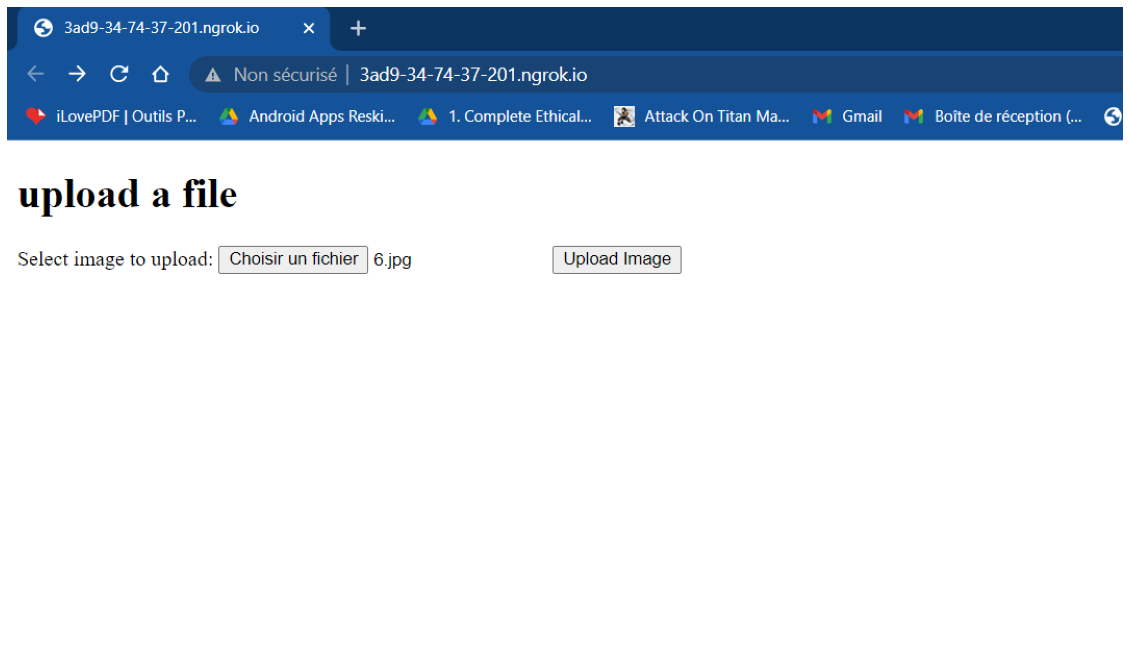

In [21]:
image = [io.imread("/content/Capture d’écran 2022-04-03 231025.png")]

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(image[0])

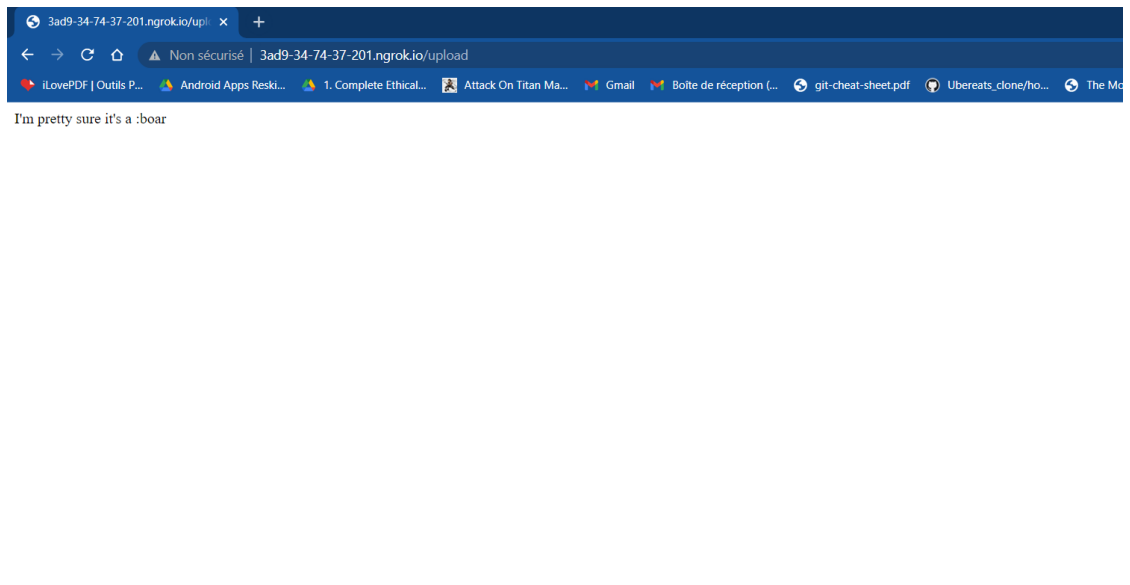

In [20]:
image = [io.imread("/content/Capture d’écran 2022-04-03 230948.png")]

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(image[0])